In [3]:
import numpy as np

np.random.seed(5)

In [12]:
def gaussian(x, mu, sig):
    expo = np.exp(-((x - mu)/sig)**2/2)
    return (1/(np.sqrt(2*np.pi)*sig)) * expo
            
display(gaussian(1, 0, 0.5))

0.10798193302637613

In [20]:
x = np.linspace(-10, 20, 200)
p_x_w1 = gaussian(x, 2, 1.5) + gaussian(x, 7, 0.5)
p_x_w2 = gaussian(x, 8, 2.5) + gaussian(x, 3.5, 1)
p_x_w1 = p_x_w1/np.trapz(p_x_w1, x)
p_x_w2 = p_x_w2/np.trapz(p_x_w2, x)

Text(0, 0.5, 'Probability')

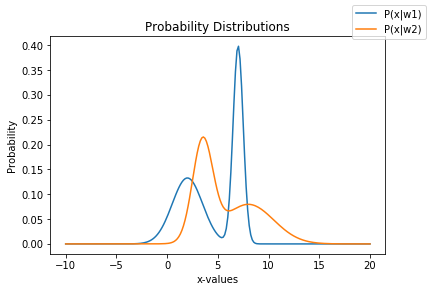

In [54]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(x, p_x_w1)
plt.plot(x, p_x_w2)
fig.legend(handles = (ax.get_children() ), labels = ('P(x|w1)', 'P(x|w2)'), loc = "upper right")
plt.title("Probability Distributions")
ax.set_xlabel("x-values")
ax.set_ylabel("Probability")

Text(0, 0.5, 'Probability')

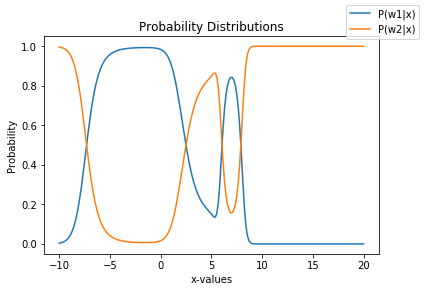

In [57]:
p_w1 = 0.5
p_w2 = 0.5
p_x = p_w1 * p_x_w1 + p_w2 * p_x_w2
p_w1_x = np.divide((np.multiply(p_w1, p_x_w1)), p_x)
p_w2_x = np.divide((np.multiply(p_w2, p_x_w2)), p_x)
fig, ax = plt.subplots()
plt.plot(x, p_w1_x)
plt.plot(x, p_w2_x)
fig.legend(handles = (ax.get_children() ), labels = ('P(w1|x)', 'P(w2|x)'), loc = "upper right")
plt.title("Probability Distributions")
ax.set_xlabel("x-values")
ax.set_ylabel("Probability")

In [110]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples = 1000, n_features = 2, n_informative = 2, n_redundant = 0, random_state = 69)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 69)

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [111]:
x1 = np.linspace(-3, 3, 200)
x2 = np.linspace(-3, 3, 200)
x1grid, x2grid = np.meshgrid(x1, x2)
Xgrid = np.array([x1grid, x2grid]).reshape([2, 40000]).T
classVals = clf.predict(Xgrid)
classVals = np.reshape(classVals, [200, 200])

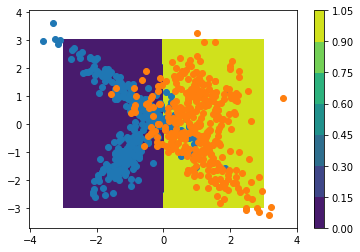

In [133]:
fig, ax = plt.subplots()
CS = plt.contourf(x1, x2, classVals)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1])
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1])
cbar = fig.colorbar(CS)
#Too lazy to label 

In [134]:
y_test_model = clf.predict(X_test)

In [135]:
nTot = len(y_test)
nMatch = 0
for i in range(len(y_test)):
    if y_test[i] == y_test_model[i]:
        nMatch += 1

print(nMatch/nTot)

0.906060606060606


Text(0.02, 0.5, 'x2')

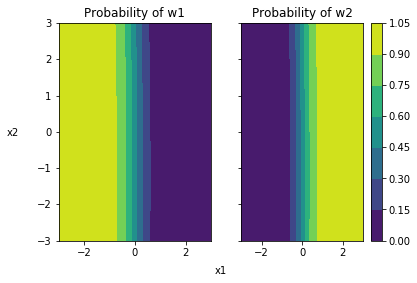

In [151]:
probVals = clf.predict_proba(Xgrid)
probGrid_w1 = np.reshape(probVals[:, 0], [200, 200])
probGrid_w2 = np.reshape(probVals[:, 1], [200, 200])
fig, ax = plt.subplots(1, 2, sharex=True, sharey = True)
CS = ax[0].contourf(x1, x2, probGrid_w1)
ax[1].contourf(x1, x2, probGrid_w2)
cbar = fig.colorbar(CS)
ax[0].set_title("Probability of w1")
ax[1].set_title("Probability of w2")
fig.text(0.5, 0.02, "x1", ha = "center", va = "center")
fig.text(0.02, 0.5, "x2", ha = "center", va = "center")